<a href="https://colab.research.google.com/github/andrecrocha/Analise-e-exploracao-de-dados/blob/master/Andr%C3%A9CRocha_MovieLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#__Análise de Dados do MOVIE LENS__
Este trabalho foi realizado com base no curso *Quarentena Dados* da [Alura Cursos Online](https://www.alura.com.br/), realizado entre os dias 20/04/20 e
24/04/20. 

O objetivo é mostrar os princípios básicos da análise de dados utilizando a linguagem *Python* e suas principais bibliotecas (*Pandas*, *Seaborn*, entre outras). 

Os dados foram obtidos do [Grupo Lens]( https://grouplens.org/datasets/movielens/) e tratam de diversos filmes e algumas de suas características. O intuito é explorar esses dados passo a passo: abrir o banco, mostrar suas principais características, plotar gráficos para análises descritivas, fazer análises de relações entre as variáveis. Tudo detalhadamente explicado. 









#Parte 1

## Abrindo o banco de dados e descobrindo suas propriedades
O primeiro passo é importar a biblioteca **pandas** do Python. A seguir, abriremos o arquivo CSV com o método `pd.read_csv()`, colocando-o em uma variável, que daremos o nome de **filmes**. A classe da variável criada pelo
pandas é **DataFrame**. 




In [27]:
import pandas as pd
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')
filmes



,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Observa-se que o conjunto de dados dos filmes contém:

**movieId**: Variável numérica que identifica o filme. A princípio, essa coluna não possui muita utilidade. Entretanto, quando comparada com os outros conjuntos de dados permite a conexão entre as informações destes dados com os demais. Isso será importante futuramente. 

**title**: Variável de texto com o nome do filme em inglês seguido pelo ano de lançamento em parênteses. Caso o filme seja estrangeiro e possua outro nome na língua original, este nome é colocado, entre parentêses, entre o nome em inglês e o ano de lançamento.

**genres**: Variável de texto com uma lista dos gêneros ao qual ele pertence.

Podemos ver a forma do DataFrame com o comando `df.shape` (número de linhas e colunas) e as colunas com o comando `df.columns` ou só algumas colunas com o comando `df["nome da coluna"]`.




In [28]:
# Propriedade: 9742 linhas e 3 colunas
filmes.shape

(9742, 3)

In [29]:
# Colunas: movieID, title, genres
filmes.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [30]:
# Mostrando só a coluna "title"
filmes['title']

0                                Toy Story (1995)
1                                  Jumanji (1995)
2                         Grumpier Old Men (1995)
3                        Waiting to Exhale (1995)
4              Father of the Bride Part II (1995)
                          ...                    
9737    Black Butler: Book of the Atlantic (2017)
9738                 No Game No Life: Zero (2017)
9739                                 Flint (2017)
9740          Bungo Stray Dogs: Dead Apple (2018)
9741          Andrew Dice Clay: Dice Rules (1991)
Name: title, Length: 9742, dtype: object

Já que os nomes estão em inglês, vamos renomear as colunas. Depois vamos usar o método `head()` para visualizar os cinco primeiros elementos do banco. O método `tail()` retorna os cinco últimos e o `sample()` retorna elementos aleatórios. 

In [31]:
filmes.columns = ['filmeID', 'titulo', 'generos']
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
filmes.tail()

,filmeID,titulo,generos
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy


In [33]:
# Retornando 10 elementos aleatórios 
filmes.sample(10)

,filmeID,titulo,generos
6853,62113,How to Lose Friends & Alienate People (2008),Comedy
7215,73023,Crazy Heart (2009),Drama|Romance
3912,5499,Robin and Marian (1976),Adventure|Drama|Romance
7914,95218,First Position (2011),Documentary
5335,8874,Shaun of the Dead (2004),Comedy|Horror
4711,7028,Quick Change (1990),Comedy|Crime
5405,25757,"Jazz Singer, The (1927)",Drama|Musical|Romance
5102,8117,In China They Eat Dogs (I Kina spiser de hunde...,Action|Comedy
7263,74545,"Ghost Writer, The (2010)",Drama|Mystery|Thriller
2077,2761,"Iron Giant, The (1999)",Adventure|Animation|Children|Drama|Sci-Fi


Agora vamos abrir outro banco de dados com as avaliações dadas pelos usuários aos filmes. Vamos atribuir a esse DataFrame a variável **notas**. 

In [34]:
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [35]:
#Mostrando os dez primeiros filmes avaliados com o método head(), parâmetro 10
notas.head(10)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


Usando o método `df.describe()` podemos ver vários indicadores dos valores que cada variável do banco contém: número de ocorrências, média aritmética, desvio padrão, valor mínimo, percentis, e valor máximo. O método `df.column.variável` retorna os valores únicos, não repetidos, de uma variável. Isso é especialmente importante para conhecermos melhor as características de nossos dados. 

In [36]:
notas.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [37]:
# Vemos aqui que as notas vão de 0.5 a 5.0, em intervalos de 0.5 
notas['rating'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Observa-se que o conjuto de dados das notas contém:

**userId:** Variável numérica que identifica o Id do usuário que postou sua nota para o filme. Dados com o mesmo valor representam avaliações de filmes diferentes feitas pelo mesmo usuário do MovieLens.

**movieId:** Variável numérica que identifica o filme. Ao contrário do primeiro conjunto de dados, neste aqui a variável possui uma significância maior. Quando temos um repetição do movieId em dados diferentes, isso indica que dois ou mais usuários do MovieLens deram suas notas para um mesmo filme.

**rating:** Variável numérica com a nota do usuário para o filme indicado. Os valores variam de 0.5 a 5.0 em intervalos de 0.5 em 0.5 ponto.

**timestamp:** Variável numérica que indica o momento em quem esse dado foi inserido no conjunto de dados. Para nossos propósitos aqui, essa variável não terá muita importância. 

In [38]:
# Agora vamos sobrescrever o nome das colunas, traduzindo-as para o português. 
notas.columns = ("usuárioID", "filmeID", "avaliação", "momento")
notas.head(10)


,usuárioID,filmeID,avaliação,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


Como separamos as informações? Como descobrir, por exemplo, apenas as avaliações do filme cujo ID é 1? 

Para isso, chamamos o método `notas.query("filmeId==1")`. Esse método retornará apenas as linhas para quais a expressão booleana, "filmeId==1", for verdadeira.


In [39]:
#Buscar as avaliações do FilmeID 1. Toy Story 1995. O método query(), retornará
#apenas as linhas para as quais a expressão booleana ("filmeID==1") for verdadeira. 
notas.query("filmeID==1")

,usuárioID,filmeID,avaliação,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


Tendo as informações do filmeId 1 podemos colocá-las na variável **avaliacoes_do_filme_1**.Depois podemos usar o método `describe()`, para analisar as estatísticas gerais dos dados. 

In [40]:
#Descrevendo os dados só da coluna que nos interessa, no caso a avaliação
avaliações_filme1 = notas.query("filmeID==1")['avaliação']
avaliações_filme1.describe()

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: avaliação, dtype: float64

A nota média deste filme é de aproximadamente **3,92**. Entretanto, é importante ressaltar que apenas a nota média não é dado suficiente pra definirmos a opinião completa sobre um filme. Para se ter uma maior confiabilidade no resultado, é importante garantir que a amostra traga uma número considerável de dados, além de se analisar a distribuição e a frequência de cada valor. Isso para evitar resultados tendenciosos por valores que divergem muito (muitas notas 0.5 e muitas notas 5.0) ou a baixa quantidade de avaliações (uma média resultante de apenas uma avaliação).

## Gerando um DataFrame mais completo
Estamos trabalhando com dois DataFrame separados. Como eles têm uma variável em comum que os conecta, a variável **movieId**, podemos fazer isso a partir dela. Isso produzirá um DataFrame mais completo, que nos ajudará a trabalhar os dados de uma melhor maneira. Usaremos o método `groupby()` para agrupar no DF notas todas as notas pelo ID dos filmes. E depois usaremos o `join()` para 
fazer o novo DataFrame. 

In [41]:
#Agrupar as avaliações pela coluna "filmeID", e pegar a média da coluna avaliação.
notas_medias_por_filme = notas.groupby("filmeID")["avaliação"].mean()
notas_medias_por_filme #Essa Variável é de tipo Series






filmeID
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: avaliação, Length: 9724, dtype: float64

In [42]:
# Agora vamos juntar a Series criada anteriormente com o DataFrame filmes.
# Repare que no join, os parâmetros são a Series que se quer adicionar e
# no "on" onde o índice da Series vai se encaixar no DataFrame. Como eles
# coincidem isso é possível. 
filmes_por_avaliacao = filmes.join(notas_medias_por_filme, on="filmeID")
filmes_por_avaliacao
filmes_por_avaliacao.head(10)





,filmeID,titulo,generos,avaliação
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
5,6,Heat (1995),Action|Crime|Thriller,3.946078
6,7,Sabrina (1995),Comedy|Romance,3.185185
7,8,Tom and Huck (1995),Adventure|Children,2.875000
8,9,Sudden Death (1995),Action,3.125000
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.496212


Podemos também ordenar os dados do DataFrame utilizando o método `sort_values`. O parâmetro é a coluna de referência com que se quer ordenar o DF. O parâmetro **ascending** se for Falso ordena do maior para o menor. 

In [43]:
# Organizando a lista pelos valores da coluna avaliação. Aqui os filmes são 
# ordenados do menor para o maior. 
filmes_por_avaliacao.sort_values("avaliação")









,filmeID,titulo,generos,avaliação
5554,26696,Lionheart (1990),Action,0.5
2689,3604,Gypsy (1962),Musical,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
9117,145724,Idaho Transfer (1973),Sci-Fi,0.5
7297,76030,Case 39 (2009),Horror|Thriller,0.5
...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN


In [44]:
# Ordenando agora de forma descrescente, usando o parâmetro ascending.
filmes_por_avaliacao.sort_values("avaliação", ascending=False).head(10)

,filmeID,titulo,generos,avaliação
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Observando esses dados, podemos fazer alguns questionamentos. Seria possível um filme ser avaliado com a nota máxima por todos? Pode ser que as pouquíssimas avaliações destes filmes no conjunto de dados tenham enviesado sua nota média. 

Infelizmente, esse é um problema comum, pois não é possível ter uma avaliação de todas as pessoas sobre todos os filmes. Por isso que chamamos estes dados de **amostras**, pois eles representam apenas parte do todo.


## Analisando os dados por meio de gráficos
Fazer gráficos é essencial no processo de análise. Isso permite que tenhamos uma ideia mais clara sobre suas características. Então, vamos plotar um gráfico das avaliações do filme 1, Toy Story, usando o método do __pandas__ `plot()`. 

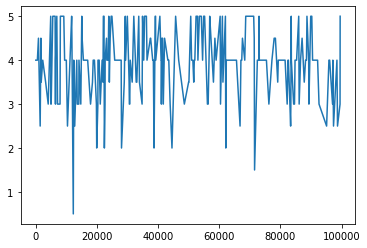

In [45]:
# Podemos fazer uma análise gráfica dos dados, usando o método plot(). Vejamos
# que o parâmetro padrão é um gráfico de linhas, o que não é adequado para o tipo
# de dados que estamos lidando aqui. 
notas.query("filmeID==1")['avaliação'].plot()




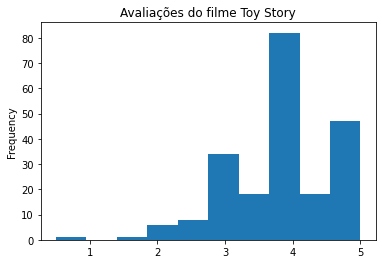

In [46]:
# Neste caso, é só alterar o parâmetro type para 'hist', obtendo assim um histrograma. O título
# coloca-se com o parâmetro title.
notas.query("filmeID==1")['avaliação'].plot(kind='hist', title="Avaliações do filme Toy Story")

Agora temos uma visualização muito mais agradável de analisar. Nesse caso, o histograma é muito melhor que o gráfico de linhas. Esses são mais adequados para séries temporais, o que não é o nosso caso aqui. 

A seguir vamos plotar o gráfico utilizando a bibliotca **matplotlib.pyplot** que nos dá muitas outras funcionalidades. Depois disso, plotaremos as avaliações de outros filmes, e verificaremos a nossa hipótese de que os filmes com notas muito altas poderão ter amostras muito enviesadas. 

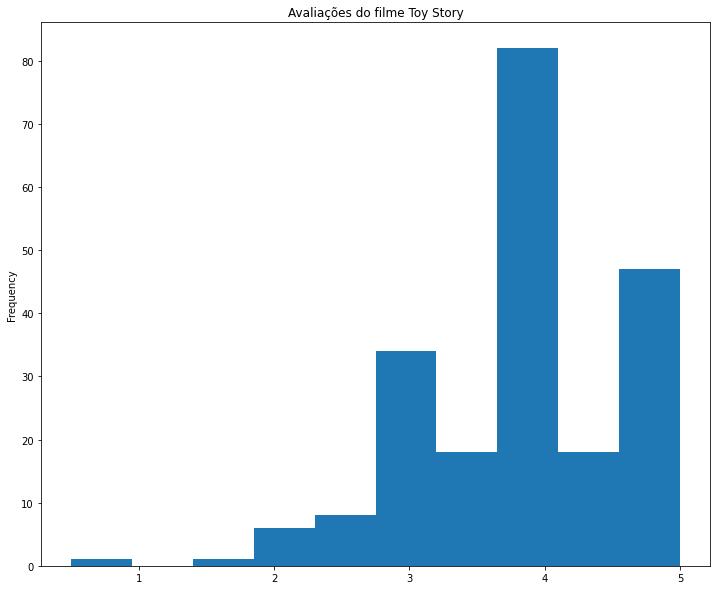

In [47]:
# Podemos usar também a biblioteca matplotlib.pyplot padrão plt. Primeiro
# vamos importá-la... 
import matplotlib.pyplot as plt
# Depois colocaremos título e ajustaremos o tamanho do gráfico. 
plt.figure(figsize=(12,10))
notas.query("filmeID==1")['avaliação'].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

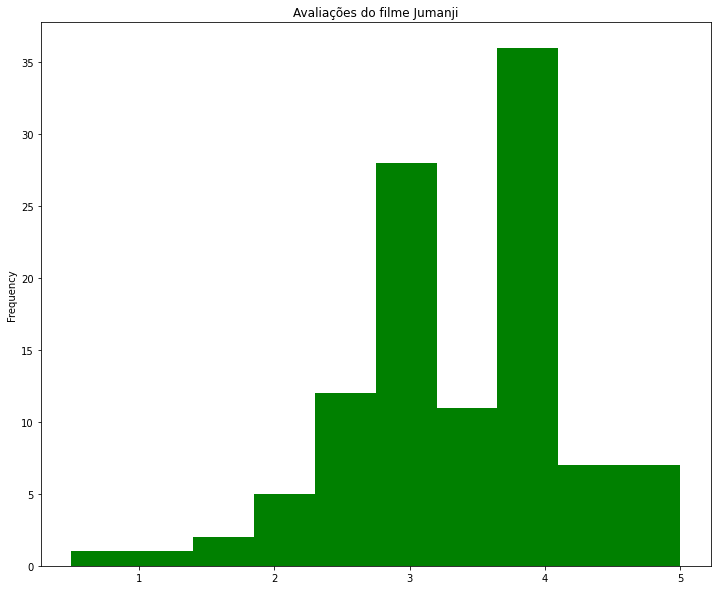

In [48]:
#Agora podemos analisar as informações gráficas de outros filmes. Agora do filme
# 2, Jumanji. 
plt.figure(figsize=(12, 10))
notas.query("filmeID==2")['avaliação'].plot(kind='hist', color="green")
plt.title("Avaliações do filme Jumanji")
plt.show()




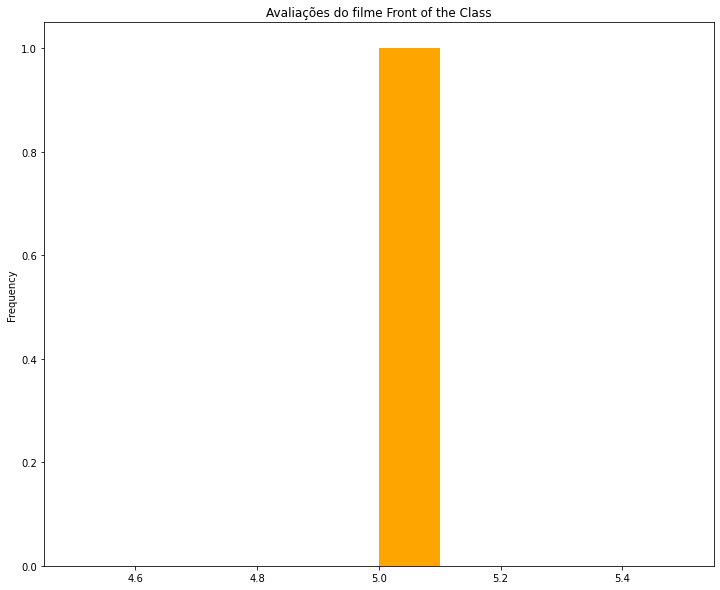

In [49]:
#Os gráficos permitem comparar e levantar hipóteses. Por exemplo, será que os filmes
# que tiveram média de avaliação 5.0 (ou seja, o total) só chegaram nessa situação
#porque poucas pessoas os avaliaram? Vamos então plotar um gráfico de um filme
# que teve uma avaliação máxima.
plt.figure(figsize=(12,10))  
notas.query("filmeID==95175")["avaliação"].plot(kind='hist', color='orange')
plt.title('Avaliações do filme Front of the Class')
plt.show()




O gráfico anterior confirma a hipótese que levantamos. Ou seja, de que filmes com notas máximas podem estar enviesados. Nesse caso, vemos que esse filme teve apenas uma avaliação, cujo valor foi 5.0. 

Agora que temos os gráficos, vamos **analisar** 

A primeira coisa que preciso saber é o que cada eixo do meu gráfico significa:

**Eixo x:** mostra a nota 

**Eixo y**: mostra a frequência das notas (quantas vezes determinada nota foi dada).

Entendido nosso gráfico, vamos contextualizar o cenário que estamos analisando:

Temos 3 filmes, dois muito populares (Toy story e Jumanji) e outro pouco conhecido (Front of the class). O ponto que chamou a atenção foi que "Front of the class" tinha média de nota maior que os dois filmes populares, Jumaji e Toy Story. Será que é um filme tão bom assim?

Dado esse cenário a primeira coisa que me chama a atenção é Front of the class ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a quantidade de votos é um aspecto importante na avaliação das médias. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Front of the class receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story. A média é um medida de centro extremamente sensível a números discrepantes. 

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a distribuição das notas também é um fator importante na avaliação das médias.

## Desafios parte 1
Vamos agora aos desafios que foram propostos durante os cursos. Eles expandirão os nossos horizontes, mostrando, simultaneamente, a simplicidade e o poder da linguagem Python para manipular e analisar dados. 

**DESAFIO 1. Arredondar as médias dos filmes pra duas casas decimais**\
Vemos que no nosso DataFrame as médias estão com muitos números depois da vírgula. Podemos arredondá-los usando o método `.round()`


In [50]:
#O método round() arredonda os valores float, flutuantes, 
# para n digitos passados como parâmetro. 
filmes_por_avaliacao["avaliação"] = filmes_por_avaliacao["avaliação"].round(2)

#Pronto! Agora os valores estão convertidos para duas casas decimais depois do
#ponto flutuante
filmes_por_avaliacao



,filmeID,titulo,generos,avaliação
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


**DESAFIO 2. Descobrindo os filmes sem avaliação** \
Quando visualizamos o DataFrame dos filmes com avaliação, vimos que alguns filmes não tinham avaliação, as células estavam com o valor **NaN**. Vamos tentar descobrir quantos são e quais são esses filmes. 



In [51]:
# Primeiro passo. Criar um DataFrame, a partir do DF Filmes e colocar nesse DF
# uma coluna que indica se o teste lógico "avaliações são nulas" é verdadeiro ou
# falso.
filmes_null = filmes
filmes_null["nulo"] = filmes_por_avaliacao['avaliação'].isnull()
filmes_null.head(10)

,filmeID,titulo,generos,nulo
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False
4,5,Father of the Bride Part II (1995),Comedy,False
5,6,Heat (1995),Action|Crime|Thriller,False
6,7,Sabrina (1995),Comedy|Romance,False
7,8,Tom and Huck (1995),Adventure|Children,False
8,9,Sudden Death (1995),Action,False
9,10,GoldenEye (1995),Action|Adventure|Thriller,False


In [52]:
# Agora, com esse DF criado, faremos um novo DF, só com os filmes cuja coluna 
# nulo é True, verdadeira
filmes_sem_avaliação = filmes_null.query("nulo==True")
print(filmes_sem_avaliação)
# Agora temos um DF só com os filmes nulos
print(filmes_sem_avaliação.shape) # Vemos que são 18 filmes. 

      filmeID  ...  nulo
816      1076  ...  True
2211     2939  ...  True
2499     3338  ...  True
2587     3456  ...  True
3118     4194  ...  True
4037     5721  ...  True
4506     6668  ...  True
4598     6849  ...  True
4704     7020  ...  True
5020     7792  ...  True
5293     8765  ...  True
5421    25855  ...  True
5452    26085  ...  True
5749    30892  ...  True
5824    32160  ...  True
5837    32371  ...  True
5957    34482  ...  True
7565    85565  ...  True

[18 rows x 4 columns]
(18, 4)


**DESAFIO 3. Colocar o número de avaliações por filmes, não só sua média.**\
Outro dado importante é o número de avaliações que cada filme tem, o que pode impactar na sua média final. Vamos criar mais uma coluna no nosso DF com essa informação. 


In [53]:
#Primeiro passo. No DF 'notas', vamos agrupar as notas pelo Id do filme
#usando o método groupby, e depois contar quantas ocorrências apareceram
#em cada filme. Vamos colocar isso em uma variável. 
num_notas = notas.groupby('filmeID')['usuárioID'].count()
num_notas

#Porque que nós contamos o número de avaliações baseado na coluna de usuários,
# e não da de avaliações? Porque já existe, no DF filmes_por_avaliação, uma coluna
#chamada "avaliação", que seria o nome da Series. Assim, para uma coluna não se
#sobrepor a outra, usamos a coluna 'usárioID'.

filmeID
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: usuárioID, Length: 9724, dtype: int64

In [54]:
#Segundo passo. Agora que criamos uma Series com a contagem dos números de 
#avaliações, vamos adicionar essa Series ao DataFrame filmes_por_avaliação
filmes_por_avaliacao = filmes_por_avaliacao.join(num_notas, on="filmeID")
filmes_por_avaliacao

,filmeID,titulo,generos,avaliação,usuárioID
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


In [55]:
#Feito isso, podemos renomar a coluna 'usuárioID'.
filmes_por_avaliacao = filmes_por_avaliacao.rename(columns={'usuárioID':'num_avaliações'})
filmes_por_avaliacao


,filmeID,titulo,generos,avaliação,num_avaliações
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


In [56]:
# Podemos agora, por exemplo, organizar os dados a partir do número de avaliações
filmes_por_avaliacao.sort_values('num_avaliações', ascending=False).head(10)

,filmeID,titulo,generos,avaliação,num_avaliações
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


**DESAFIO 4. Descobrir quantos gêneros existem e seus nomes únicos**\
Vamos agora tentar descobrir o número de Gêneros existentes e seus nomes únicos. Faremos isso de dois modos. O primeiro utilizando o laço de repetição 
**for** e **listas**. O segundo usando um método do pandas para lidar com variáveis de tipo **string** chamado `get.dummies()`. 

PRIMEIRO MODO: Laços FOR e Listas

In [57]:
# Primeiro modo. Fazendo uma lista com os nomes do gêneros do primeiro filme do
# DataFrame. Usamos o método split() para indicar o ponto em que separamos os 
#elementos. 
lista = filmes_por_avaliacao["generos"][0].split("|")
lista

# Os gêneros ficam guardados numa lista, que tem indexação numérica (0,1,2,3...).


['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [58]:
""" Agora vamos usa o laço for para vazer todos os valores no DataFrame da coluna
generos. Para cada valor, criaremos uma lista (lista1) com os nomes dos gêneros, usando
a mesma lógica do passo anterior, com o split(),etc. Para cada nome dessa lista1,
(o segundo for), se esse nome não estiver na lista original (lista), nós adicionamos ele, 
até que tenhamos varridos todos os elementos. Ao final, nossa lista original terá
o nome de todos os gêneros, sem repeti-los. """ 

for gen in filmes_por_avaliacao["generos"]:
  lista1 = gen.split("|")
  for c in lista1:
    if c not in lista:
      lista.append(c)
    else:
      continue
print(lista)

# O número de gêneros é dado pelo tamanho da lista, usando o método len(lista).
len(lista)



['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX', 'Western', 'Film-Noir', '(no genres listed)']


20

SEGUNDO MODO: usando o método `get.dummies()` do pandas. 

In [59]:
#Segundo modo.Outro modo de fazer é utilizando o método get_dummies do pandas.
dummy_generos = filmes_por_avaliacao.generos.str.get_dummies('|')
# O método vai retornar um outro DataFrame com as strings nas colunas, já em ordem
# alfabética, e nas linhas, correspondentes às avaliações, se essas strings aparecerem
# contabiliza-se um ponto (1)
dummy_generos


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
# Agora podemos transformar as colunas desses gêneros em uma lista, com indexação
# numérica, usando o método "to_list()"
generos = dummy_generos.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

**DESAFIO 5. Descobrir quantos filmes tem em cada gênero**\
Agora vamos tentar descobrir quais são os gêneros que mais aparecem. Faremos isso de dois modos, igual ao desafio anterior. O primeiro definindo uma **função** e depois usando o laço **for**. O segundo usando o método `.sum()`. 

PRIMEIRO MODO: funções e listas

In [61]:
# A função vai receber como parâmetro o nome do gênero
def freqGênero(msg): 
  cont = 0
  for elemento in filmes_por_avaliacao["generos"]:
    valores = elemento.split("|")
    if msg in elemento:
      cont += 1
  return cont 

# Criar outra listas com as frequências.
frequencia = list()
for c in generos:
  print(f'Nome do filme: {c} - Aparições: {freqGênero(c)}')
  frequencia.append(freqGênero(c))

frequencia


Nome do filme: (no genres listed) - Aparições: 34
Nome do filme: Action - Aparições: 1828
Nome do filme: Adventure - Aparições: 1263
Nome do filme: Animation - Aparições: 611
Nome do filme: Children - Aparições: 664
Nome do filme: Comedy - Aparições: 3756
Nome do filme: Crime - Aparições: 1199
Nome do filme: Documentary - Aparições: 440
Nome do filme: Drama - Aparições: 4361
Nome do filme: Fantasy - Aparições: 779
Nome do filme: Film-Noir - Aparições: 87
Nome do filme: Horror - Aparições: 978
Nome do filme: IMAX - Aparições: 158
Nome do filme: Musical - Aparições: 334
Nome do filme: Mystery - Aparições: 573
Nome do filme: Romance - Aparições: 1596
Nome do filme: Sci-Fi - Aparições: 980
Nome do filme: Thriller - Aparições: 1894
Nome do filme: War - Aparições: 382
Nome do filme: Western - Aparições: 167


[34,
 1828,
 1263,
 611,
 664,
 3756,
 1199,
 440,
 4361,
 779,
 87,
 978,
 158,
 334,
 573,
 1596,
 980,
 1894,
 382,
 167]

SEGUNDO MODO: método `sum.()` e Series

In [62]:
# Segundo modo. Pode-se pegar o DF com os gêneros e simplesmente
# somar suas colunas, retornando uma Series com os índices igual aos 
# gêneros e os valores iguais ao número de aparições... 
total_de_filmes_por_generos = dummy_generos.sum()
total_de_filmes_por_generos


(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

**DESAFIO 6. Fazer um plot do gráfico de barras de cada gênero**\
Vamos agora plotar um gráfico de barras para termos uma melhor visualização da
diferença do número de gêneros. 

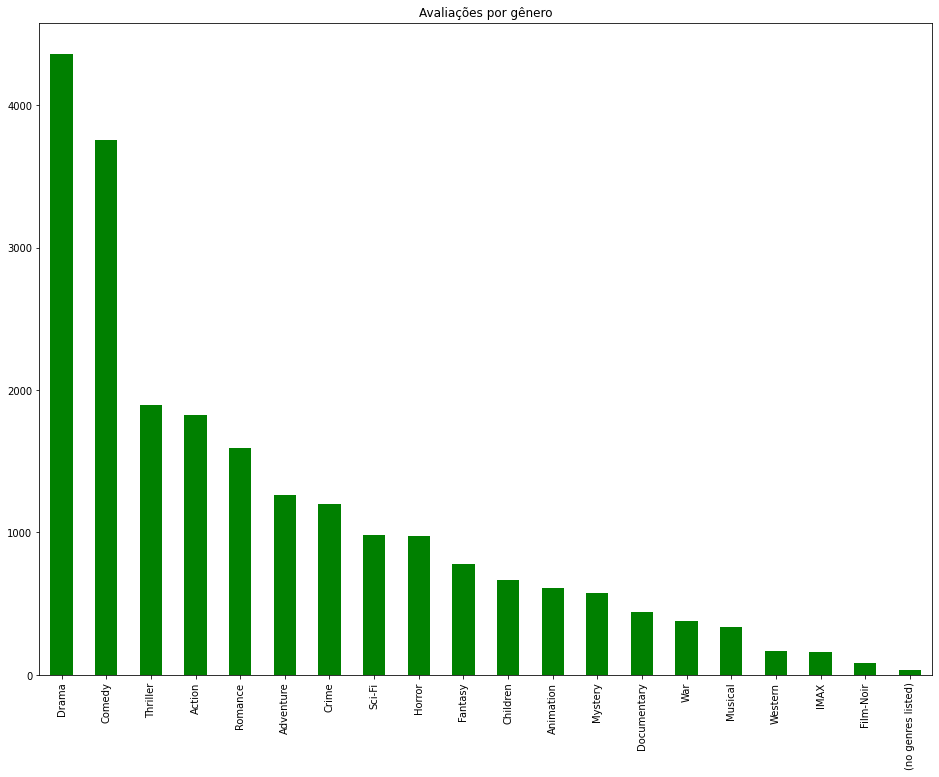

In [63]:
# Agora com as Series em mãos, vamos fazer o histograma, definindo o tamanho, a cor das barras e o título do gráfico.
total_de_filmes_por_generos.sort_values(ascending=False).plot(kind='bar', figsize=(16, 12), color='green', title='Avaliações por gênero')


# Parte 2

## Analisando medidas de centro com histogramas e boxplot
Nesta segunda parte vamos estudar com mais profundidade as técnicas de centralidade e conhecer algumas boas práticas de visualização de dados. 

Vamos começar pelo **desafio 05**, onde segregamos os gêneros de cada um dos filmes contidos na base de dados do **Movie Lens**. 

Vamos relembrar como os dados estavam configurados.



In [77]:
# Primeiro temos uma Series dos gêneros e o número de seus aparecimentos, ordenados
# do maior para o menor... 
total_de_filmes_por_generos.sort_values(ascending=False)



Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Podemos agora fazer um gráfico para analisar esses dados de forma mais clara. O plot padrão do pandas é um gráfico de linhas...

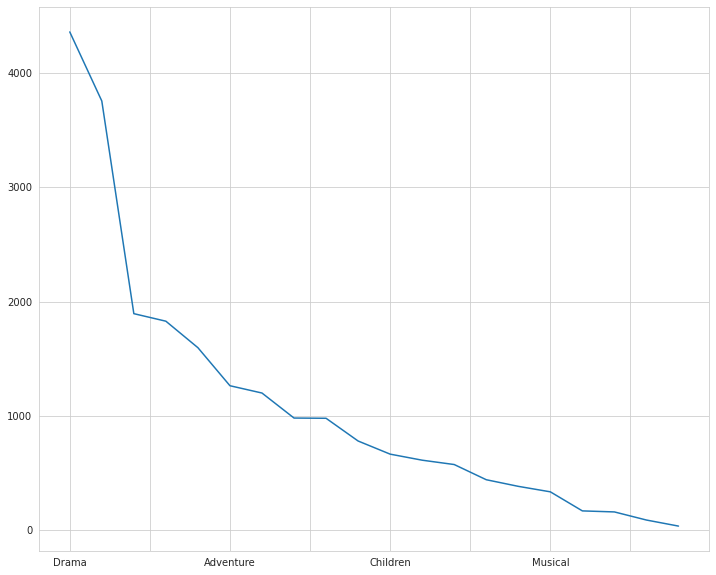

In [80]:
total_de_filmes_por_generos.sort_values(ascending=False).plot(figsize=(12,10))

Vemos que esse gráfico de linhas não faz nenhum sentido nesse contexto, proque o gênero de filmes é uma variável categórica (dividida por categorias). Então vamos tentar o gráfico de pizza. 

'\nEsse gráfico se mostra inadequado por vários motivos\n1 - As corese se repetem\n2 - É dificil visualizar a magnitude da diferença exata entre os gêneros, principalmente entre\naqueles que tem valores parecidos (ex: Musical e War, Thriller e Action...)\n3 - É um gráfico intransparente, portanto! \n'

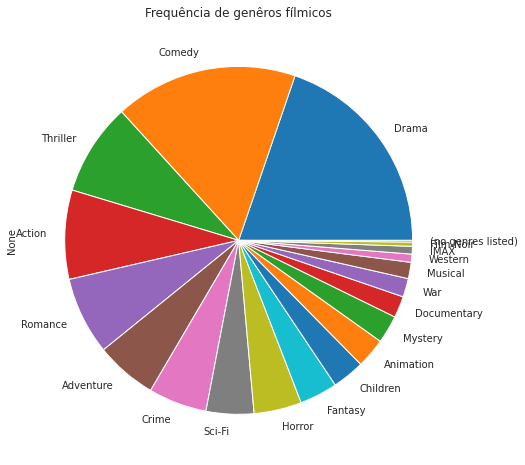

In [82]:
# Plotando o gráfico de pizza...  
total_de_filmes_por_generos.sort_values(ascending=False).plot(
     kind='pie', figsize=(12,8), title="Frequência de genêros fílmicos")



Esse gráfico se mostra inadequado por vários motivos: \
**1** - Vemos que as cores se repetem \
**2** - É dificil visualizar a magnitude da diferença exata entre os gêneros, principalmente entre aqueles que tem valores parecidos (ex: Musical e War, Thriller e Action...) \
**3** - É um gráfico intransparente, portanto! 


Uma solução mais adequada seria plotar o gráfico de barras, como fizemos no **desafio 06** da parte 1. Porém, podemos melhorá-lo mais ainda... Primeiro vamos colocar um grid (uma grade) de linhas para visualizarmos melhor a magnitude das diferenças. Para isso, vamos importar a biblioteca **seaborn**. 

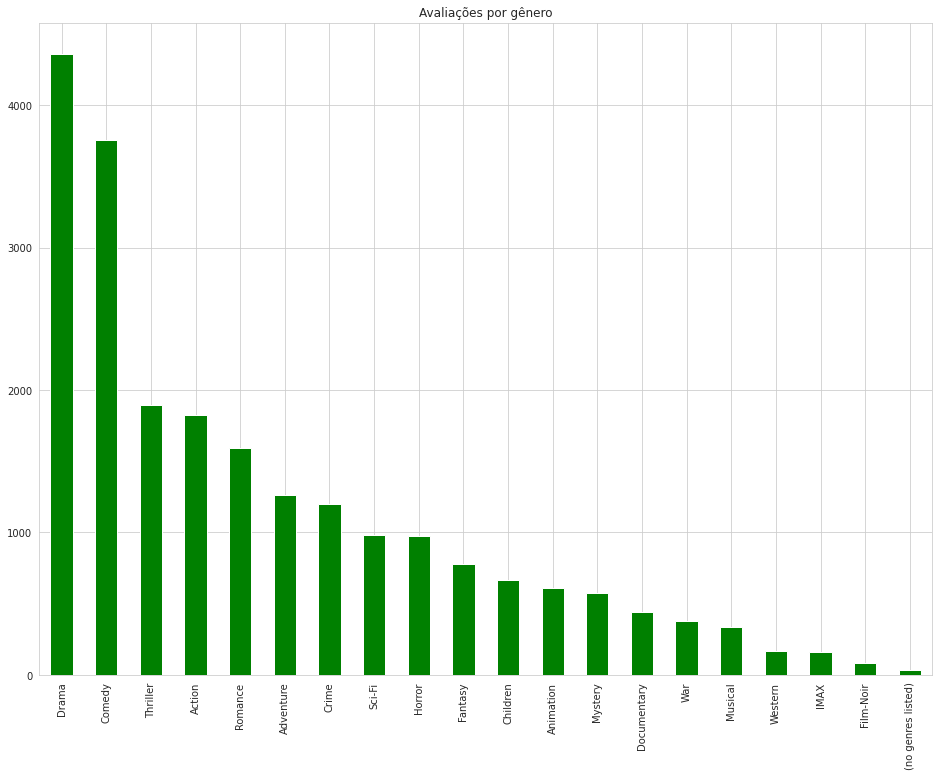

In [83]:
import seaborn as sns
sns.set_style('whitegrid')
total_de_filmes_por_generos.sort_values(ascending=False).plot(kind='bar', figsize=(16, 12), color='green', title='Avaliações por gênero')

O gráfico de barras está muito melhor de visualizarmos as diferenças entre os 
gêneros. 

Veja como o gráfico de barra torna a análise mais simples, logo de cara a diferença entre **Drama e Comedy**, comparado aos demais gêneros fica evidênte. No gráfico de pizza era super difícil comparar **Thriller e Action**, agora a comparação ficou fácil e conseguimos perceber o quão perto estão uma da outra.

A interpretação dos dados melhorou muito com essa visualização, mas podemos melhorar ainda mais. O que queremos é tornar evidênte os gêneros que tem a maior participação nos filmes em geral, ou seja transparecer através da imagem uma visão geral de proporcionalidade. Para tornar evidênte essa informação vamos utilizar algo "semelhante" a um mapa de calor. 

Para isso vamos plotar o gráfico pelo **seaborn**, que nos dá funcionalidades extras. Para facilitar a inserção do código, vamos colocar os dados ordenados da Series dentro de uma variável.

Não plotamos mais a imagem com o `.plot()` do pandas. Chamamos o barplot do seaborn, adicionando uma paleta de cores com efeito de mapa de calor (parâmetro pallette), no parâmetro `n_color` de `sns.color_palette()` adicionamos +4 para que a última barra não seja totalmente transparente. 

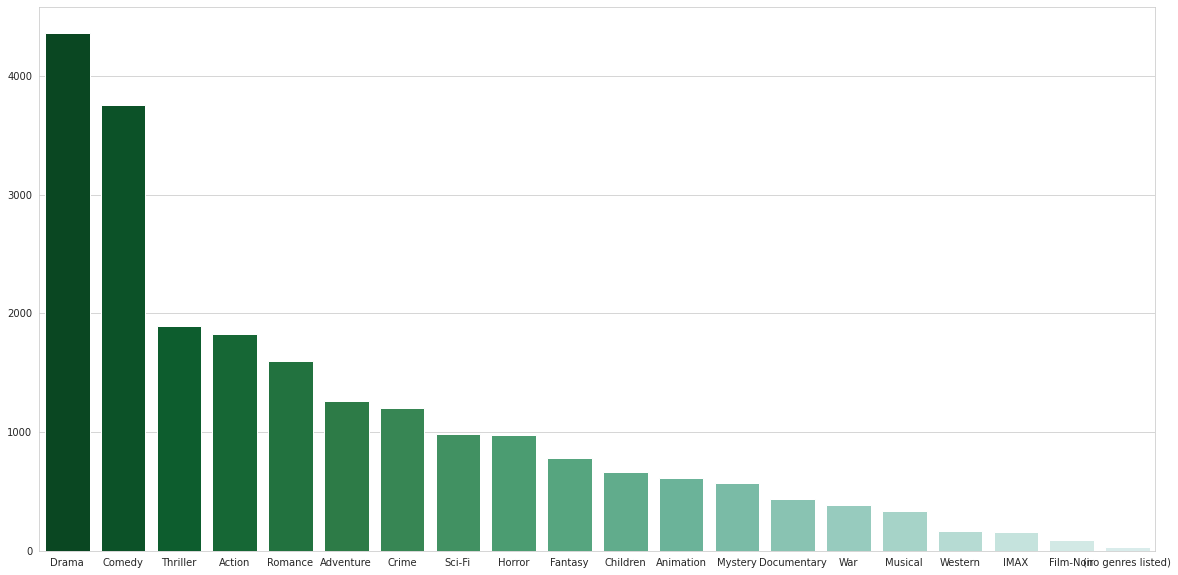

In [89]:
ordem = total_de_filmes_por_generos.sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x=ordem.index,
            y=ordem.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(ordem) + 4), )

plt.show()



Conseguimos analisar e tirar diversas conclusões trabalhando com a visualização dos gêneros. Será que conseguimos utilizar visualizações para entender melhor as notas de um filme?

Vamos relembrar alguns pontos que já discutimos e nos aprofundar nas análises de notas para tirar conclusões mais sofisticadas.


Na **parte 01** calculamos as notas médias por filmes, vamos dar uma olhada no resultado.

In [90]:
filmes_por_avaliacao.head()

,filmeID,titulo,generos,media_notas,num_avaliações
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


Como vimos, olhar apenas as médias pode ser um problema e para interpretar um pouco melhor os dados usamos o histograma das notas para comparar alguns filmes. Por exemplo, **Toy Story e Jumanji**. 

3.92


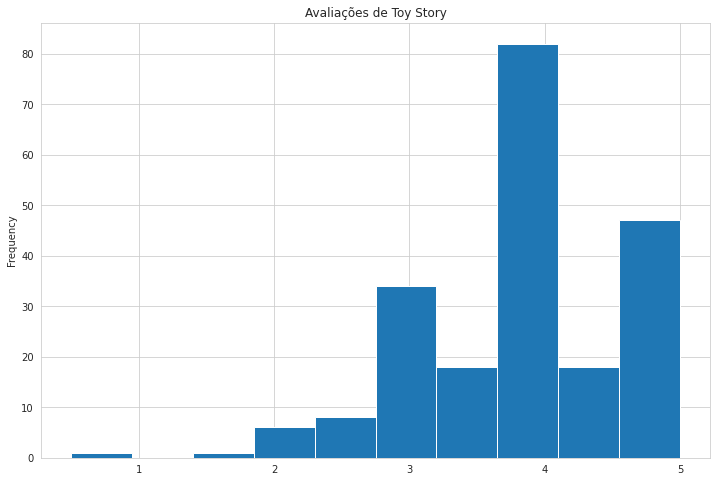

In [91]:
#Agora usar o mesmo método de histograma para analisarmos as notas dos filmes.
print(f'{notas.query("filmeID==1")["avaliação"].mean():.2f}') # printar a média
notas.query("filmeID==1")["avaliação"].plot(kind='hist', figsize=(12,8), title="Avaliações de Toy Story")


3.43


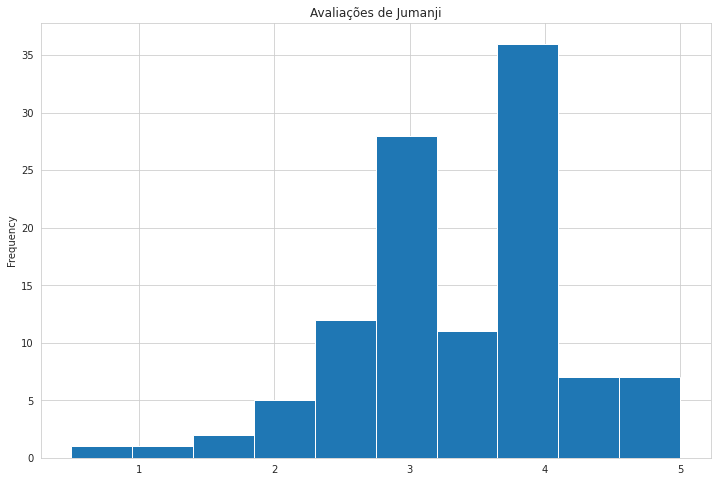

In [92]:
print(f'{notas.query("filmeID==2")["avaliação"].mean():.2f}')
notas.query("filmeID==2")["avaliação"].plot(kind="hist", figsize=(12,8), title='Avaliações de Jumanji')

ToyStory e Jumanji tem médias relativamente próximas mas com comportamento de notas diferentes, então, para nosso exemplo, as médias ajudam mas esconde informações importantes sobre os dados.

Outras métricas que podem nos ajudar a interpretar melhor os dados são os quartis, principalmente a mediana. 

Vamos buscar dois filmes com médias muito mais próximas que Toy Story e Jumanji, para analisar outras métricas além das médias. Vamos utilizar o fatiamento do Python para buscar valores no meio do DataFrame. 

In [100]:
filmes_por_avaliacao.sort_values("media_notas", ascending=False)[2470:2520]

,filmeID,titulo,generos,media_notas,num_avaliações
1323,1785,King of New York (1990),Crime|Thriller,3.90,5.0
802,1050,Looking for Richard (1996),Documentary|Drama,3.90,5.0
6613,55820,No Country for Old Men (2007),Crime|Drama,3.90,64.0
86,97,"Hate (Haine, La) (1995)",Crime|Drama,3.90,10.0
9710,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,3.90,5.0
785,1028,Mary Poppins (1964),Children|Comedy|Fantasy|Musical,3.89,71.0
706,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,3.89,109.0
3564,4880,Life as a House (2001),Drama,3.89,9.0
6884,63072,"Road, The (2009)",Adventure|Drama|Thriller,3.89,9.0
1608,2150,"Gods Must Be Crazy, The (1980)",Adventure|Comedy,3.89,28.0


Ordenando os filmes pelas notas médias e fatiando os dados entre 2470 e 2520, temos uma região onde as médias são semelhantes. Vamos comparar o filme **Wizard of Oz** (filmeId=919) e **Little Miss Sunshine** (filmeId=46578). Ambos tem um bom número de avaliações, 92 e 77, respectivamente. 

Para não precisar copiar e colar toda hora o plot dos gráficos vamos criar uma **função**, assim passamos apenas o FilmeId e temos as informações desejadas. Vamos fazer uma função para plotar a distribuição de histograma dos filmes, já com o gráfico de caixas e com a descrição dos dados. 


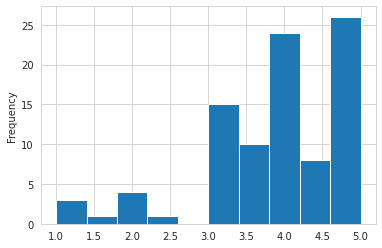

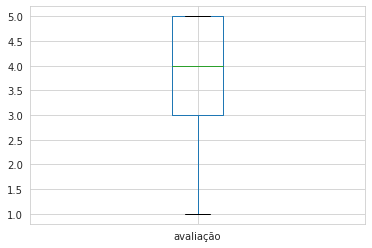

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: avaliação, dtype: float64

In [106]:
  def histfilmes(id):
    notas.query(f'filmeID=={id}')["avaliação"].plot(kind="hist")
    plt.show()
    print('\n')
    notas.query(f'filmeID=={id}')["avaliação"].plot.box() #Fazer o gráfico de caixa
    plt.show()
    return notas.query(f'filmeID=={id}')["avaliação"].describe()

# Agora vamos passar a função para o filme histograma do filme Mágico de OZ 
histfilmes(919)

# Podemos ver que foram 92 avaliações, média de 3.880, mediana de 4 e por aí
# vai... 




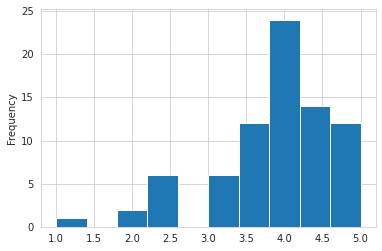

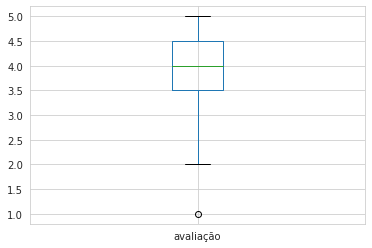

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: avaliação, dtype: float64

In [107]:
# Chamemos nossa função agora para o filme "Little Miss Sunshine", de 1999
histfilmes(46578)

#Assim, podemos ver que apesar dos dois filmes terem a mesma média, as notas
#para O sexto sentido foram muito mais dispersas (desvio padrão maior), teve
#uma nota mínima (aparentemente duas)

Agora com essas informações conseguimos comparar melhor os filmes. Analisando os histogramas vemos que muitas pessoas realmente amam **Wizard of Oz** (notas 5), mas também temos pessoas que não gostam de formal alguma (notas 1).Quando comparamos com a histograma do filme **Little miss sunshine**, percebemos que os resultados se concentram entre valores medianos(notas 2.5- 4.0) 

O que confirma nossa análise aqui é comparar os quartis **25% 50% e 75%**. 50% é o valor da mediana, e ambos os filmes tem a mesma mediana, mas 25% e 75% são diferentes. Visualmente, isso fica nítido no gráfico do **Boxplot**. 

Interpretando o Boxplot vemos que a linha verde que divide a caixa em dois é a **mediana** (compare com as estatísticas geradas pelo describe()), a parte superior da caixa é o **3° Quartil (75%)** e a parte inferior é o **1° Quartil(25%)**. 

Agora repare nos limites inferior e superior, representados pelas extremidades em preto. Por coincidência, no BoxPlot do __Mágico de OZ__ os limites inferior e superior são equivalentes ao ponto de máximo e mínimo, mas nem sempre será assim. Algumas vezes os limites podem sobrepor os extremos das "caixas" e isso geralmente ocorre quando temos uma quantidade pequena de dados.

No BoxPlot do **Little miss sunshine** vemos que não há uma sobreposição do limite superior. Nesse último caso temos uma informação a mais, a bolinha localizada em ** y = 1 **. Trata-se de um valor discrepante, um *outlier*, que vai além dos limites superior e inferior. Há várias maneiras de calculá-lo, mas não entraremos em detalhes aqui.

Agora comparando os boxplot dos dois filmes deixa muito mais evidente as diferenças entre eles, o que ficava complexo olhando só médias e outras informações separadas.

Embora melhoramos muito nossa qualidade de análise ainda temos mais um ponto. Estamos comparando os boxplot dos filmes, então podemos juntar vários boxplot em uma imagem só. Faremos isso utilizando o **seaborn**. 

Chamamos o `sns.boxplot()` passando três parâmetros. Parâmetro **dados** é um DataFrame das notas dos filmes com **Toy Story**, **Jumanji**, **Wizard of Oz** e **Little miss sunshine** (usamos o `.query()` para selecionar os dados), a variável **x** é o Id do filme e a variável **y** as respectivas notas. Agora conseguimos comparar as notas dos filmes de forma muito mais clara. 


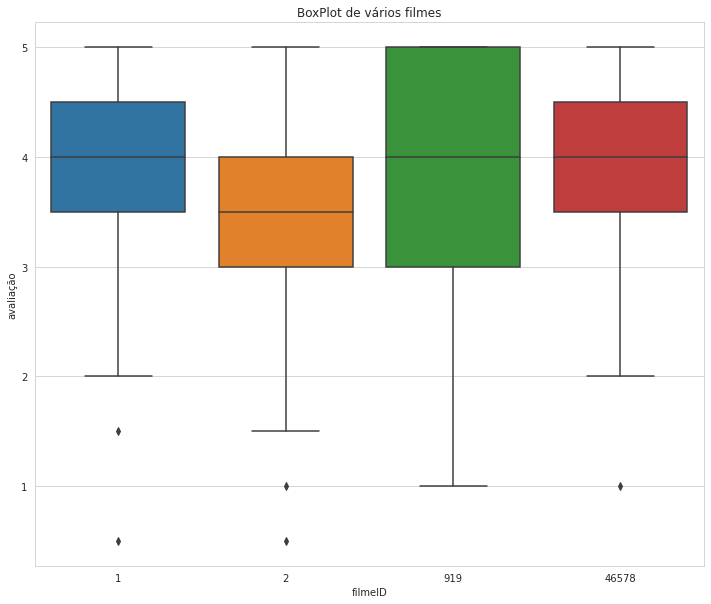

In [112]:
plt.figure(figsize=(12,10))
plt.title("BoxPlot de vários filmes")
sns.boxplot(data = notas.query("filmeID in [1,2,919,46578]"), x="filmeID", y="avaliação")
plt.show()

##Desafios Parte 2

**DESAFIO 1. Rotacionar os thicks do histograma** \
No histograma que fizemos dos gêneros alguns nomes ficaram embaralhados. Vamos rotacionar essas *labels* para que elas fiquem mais legíveis. Podemos fazer isso com o **pyplot** usando o método `xticks()` com o parâmetro `rotation=45`, ou seja rotacionar em 45 graus e alinhar a direita com o parâmetro `horizontalalignment="right"`. 

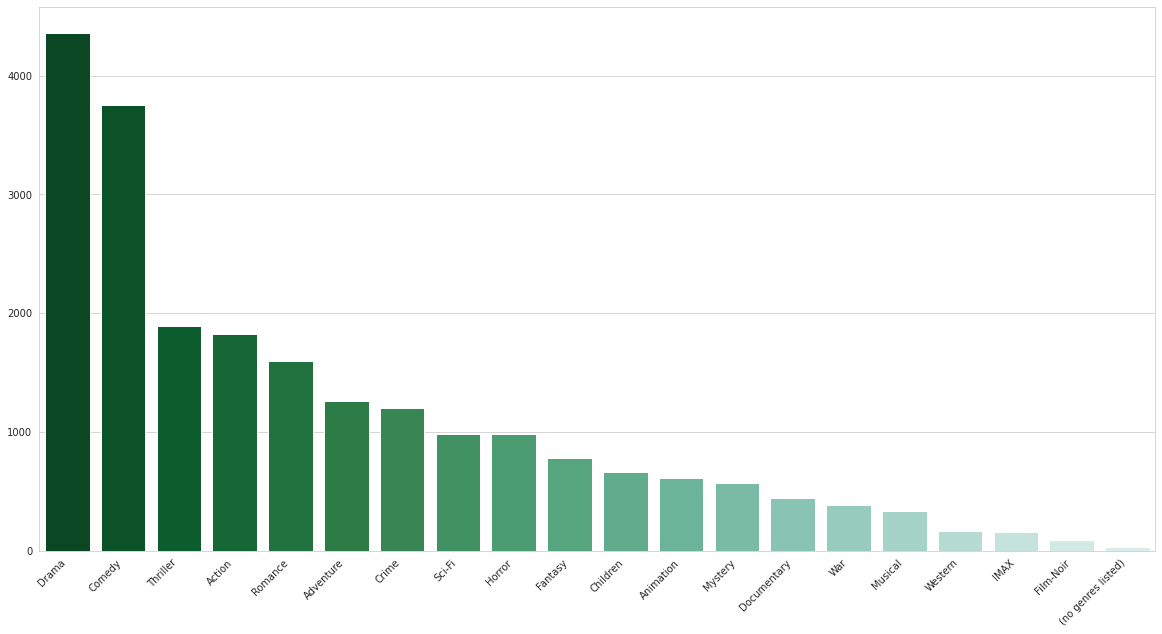

In [113]:
plt.figure(figsize=(20, 10))
sns.barplot(x=ordem.index,
            y=ordem.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(ordem) + 4), )
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

**DESAFIO 2. Criar o boxplot dos 10 filmes mais votados, colocando o nome nos thicks, e depois analisar e tirar conclusões.** \
No DataFrame **filmes_por_avaliacao** já colocamos uma variável do número de avaliações. Vamos primeiro ordenar o DF por essa variável, e listar os 10 filmes mais votados colocando-os em uma variável.


In [115]:
top10 = filmes_por_avaliacao.sort_values("num_avaliações", ascending=False).head(10)
top10

,filmeID,titulo,generos,media_notas,num_avaliações
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251.0
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238.0
97,110,Braveheart (1995),Action|Drama|War,4.03,237.0
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224.0
461,527,Schindler's List (1993),Drama|War,4.22,220.0


Feito isso, vamos colocar os nomes e as IDS dos filmes em listas, usando o método `to.list()`. 

In [116]:
nome_mais_votados = top10['titulo'].to_list()
nome_mais_votados

['Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Jurassic Park (1993)',
 'Braveheart (1995)',
 'Terminator 2: Judgment Day (1991)',
 "Schindler's List (1993)"]

In [117]:
id_mais_votados = top10['filmeID'].to_list()
id_mais_votados

[356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]

In [118]:
notas

,usuárioID,filmeID,avaliação,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Agora, com uma lista dos ID's dos mais votados em mãos, vamos plotar o gráfico usando o **seaborn**. 

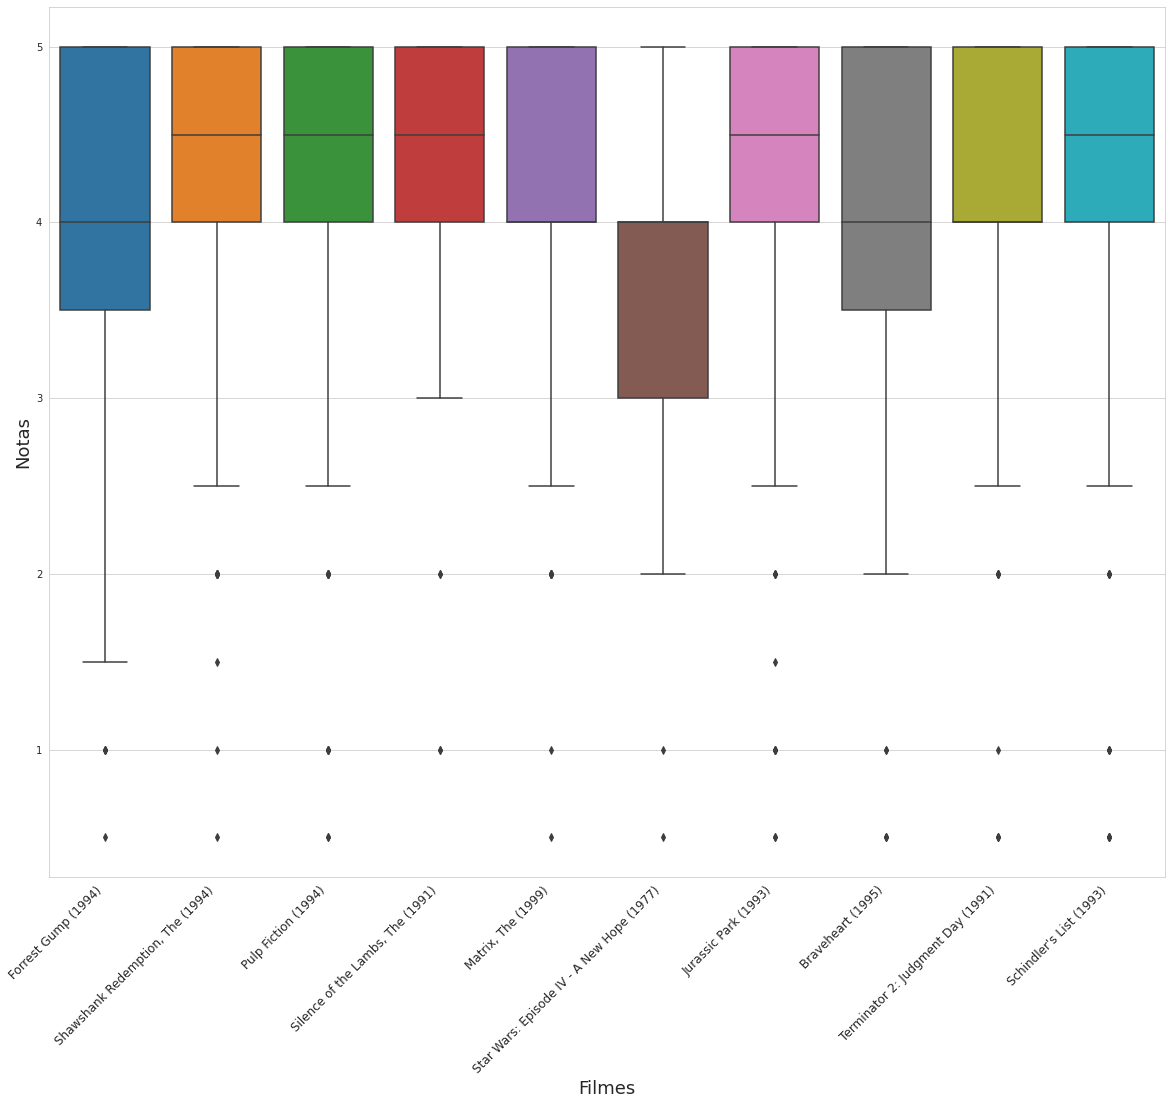

In [121]:
plt.figure(figsize=(20,16))
ax = sns.boxplot(data=notas.query(f'filmeID in {id_mais_votados}'), x='filmeID', y='avaliação')
ax.set_xticklabels(nome_mais_votados, fontsize=12, rotation=45, horizontalalignment='right')
ax.set_xlabel("Filmes", fontsize=18)
ax.set_ylabel("Notas", fontsize=18)
plt.show()

Vemos que os filmes mais votados tem umas distribuição de avaliações muito parecidas e a totalidade deles tem a mediana igual a 4 ou maior, o que significa que pelo menos 50% das notas de cada um foi alta. Podemos aventar a hipótese de que são filmes muito populares, e os filmes muito populares recebem mais avaliações que, em sua maioria, são positivas. 

**DESAFIO 4. Fazer uma função que calcule a moda, média e mediana dos filmes.**\ 
Vamos criar uma função cuja parâmetro é o ID do filme, e que mostra a média, a mediana e a moda. Usaremos a função `.iloc[]` para localizar, a partir do ID do filme, na linha 0 (ou seja a única), os valores da coluna 1 (nome) e 2 (gênero). Para a média, mediana e moda usamos `.mean()`, `.median()` e `.mode()`. 

In [125]:
def explorarfilmes(filmeid):
  print("---" * 10)
  print(f'FilmeID:{filmeid}')
  print()
  print(f'Nome do filme: {filmes.query(f"filmeID=={filmeid}").iloc[0,1]}')
  print(f'Gênero: {filmes.query(f"filmeID=={filmeid}").iloc[0,2]}')
  print()
  print(f'Média: {notas.query(f"filmeID=={filmeid}")["avaliação"].mean():.2f}')
  print(f'Mediana: {notas.query(f"filmeID=={filmeid}")["avaliação"].median():.1f}') #Achar a mediana com o método median()
  print(f'Moda: {(notas.query(f"filmeID=={filmeid}")["avaliação"].mode().values)}')


explorarfilmes(110)
explorarfilmes(345)
explorarfilmes(1234)




------------------------------
FilmeID:110

Nome do filme: Braveheart (1995)
Gênero: Action|Drama|War

Média: 4.03
Mediana: 4.0
Moda: [5.]
------------------------------
FilmeID:345

Nome do filme: Adventures of Priscilla, Queen of the Desert, The (1994)
Gênero: Comedy|Drama

Média: 3.60
Mediana: 4.0
Moda: [4.]
------------------------------
FilmeID:1234

Nome do filme: Sting, The (1973)
Gênero: Comedy|Crime

Média: 3.98
Mediana: 4.0
Moda: [4.]


**DESAFIO 5. Plotar o histograma e o boxplot um do lado outro, na mesma figura.** \
Vamos pegar um filme qualquer, tipo Forrest Gump, e usar o método `subplots()`do **pyplot** para colocá-los lado a lado. 

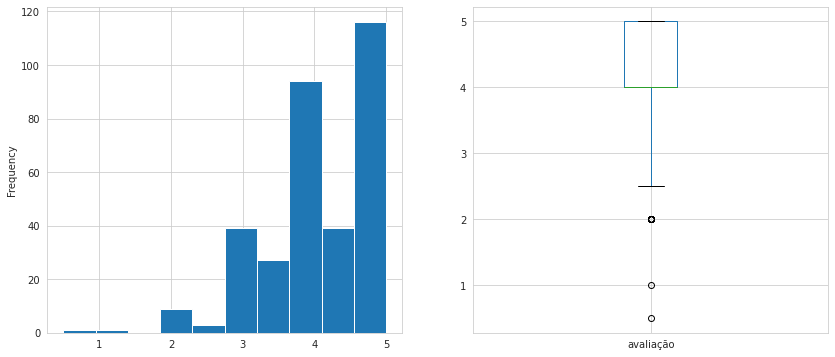

In [126]:
#Vamos lá, primeiro pegar um filme qualquer
forrest_gump = notas.query("filmeID==356")["avaliação"]

f, axes = plt.subplots(1, 2, figsize=(14,6))

forrest_gump.plot(kind='hist', ax=axes[0])
forrest_gump.plot(kind='box', ax=axes[1])

plt.show()



**DESAFIO 6. Criar um gráfico de notas médias por ano de lançamento dos filmes**
Podemos agora fazer um gráfico de linha, para ver a média de todos os filmes lançados por ano. Como é um série temporal, o gráfico de linhas será de grande valia. 

Primeiro passo. Criar um DataFrame com a variável ano de lançamento. Para isso manipularemos a string do titulo, retirando dela o ano com o [método extract()](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#extracting-substrings) e colocando o resultado em um variável. 

In [128]:
#Primeiro passo 
filmes_por_avaliacao_e_ano = filmes_por_avaliacao.copy()
filmes_por_avaliacao_e_ano["ano"] = filmes_por_avaliacao["titulo"].str.extract("\((\d{4})\)")
filmes_por_avaliacao_e_ano




,filmeID,titulo,generos,media_notas,num_avaliações,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0,1995
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0,1995
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0,2017
9739,193585,Flint (2017),Drama,3.50,1.0,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0,2018


Agora vamos fazer uma variável com a média das médias de cada ano, e depois plotar o gráfico. 

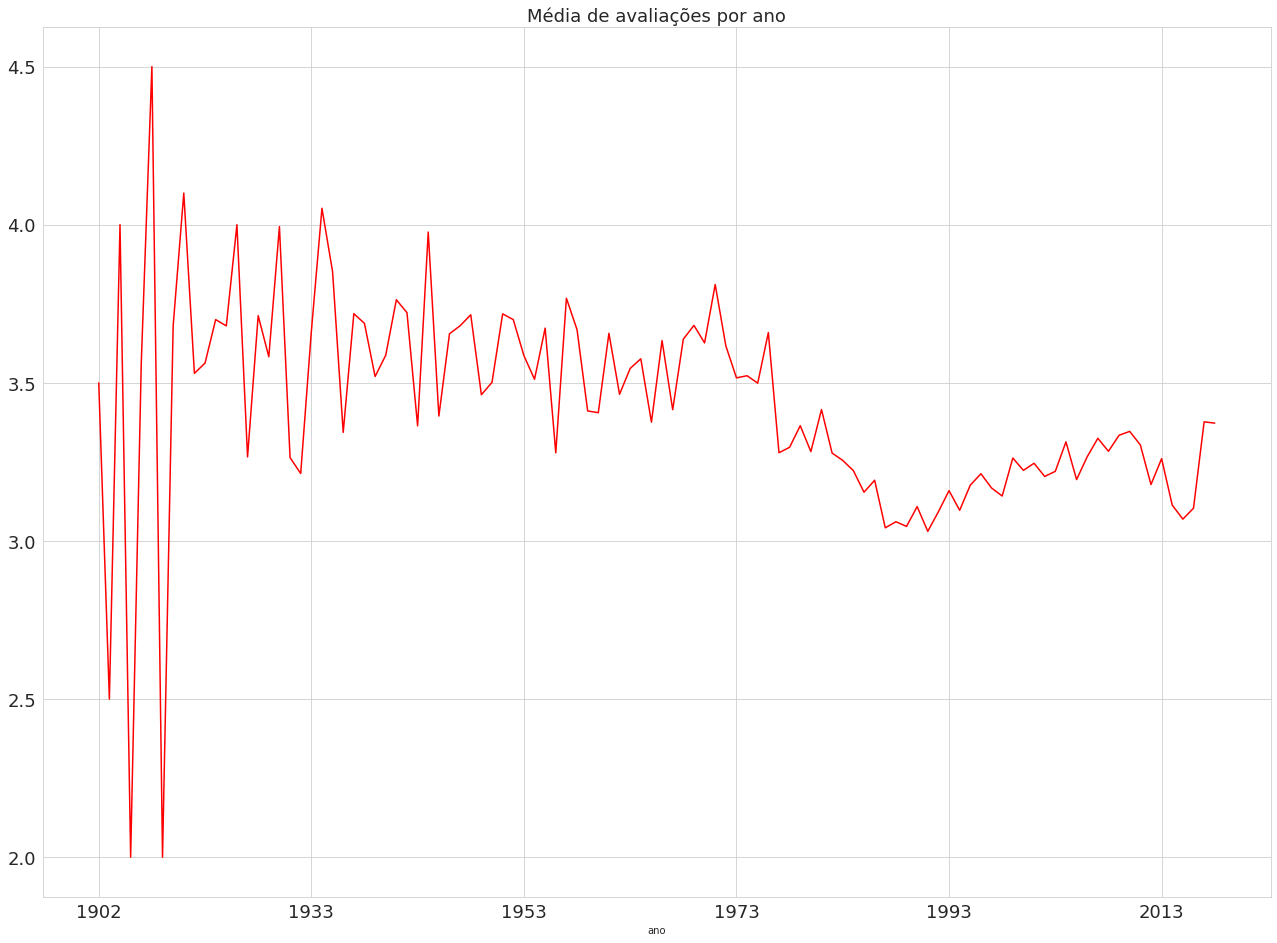

In [132]:
#Segundo passo
medias_anos = filmes_por_avaliacao_e_ano.groupby("ano")["media_notas"].mean()
plt.figure(figsize=(22,16))
medias_anos.plot(fontsize=18, color='red')
plt.title("Média de avaliações por ano", fontsize=18)
plt.show()